In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
missing_values = ['N/A','--','n/a','NaN','na']
data=pd.read_csv("C:/Users/Nirav/Desktop/DataSet/Life expectancy.csv",na_values=missing_values)
print("total no.of rows and columns:",data.shape)
print("total size:",data.size)

total no.of rows and columns: (2938, 22)
total size: 64636


In [3]:
data1=pd.read_csv("C:/Users/Nirav/Desktop/DataSet/continents2.csv",na_values=missing_values)

In [4]:
data.shape

(2938, 22)

In [5]:
print("Total no.of countries:",len(data['Country'].unique()))

Total no.of countries: 193


In [6]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [8]:
print("data description:\n",data.describe())

data description:
               Year  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000      2928.000000    2938.000000  2744.000000   
mean   2007.518720       164.796448      30.303948     4.602861   
std       4.613841       124.292079     117.926501     4.052413   
min    2000.000000         1.000000       0.000000     0.010000   
25%    2004.000000        74.000000       0.000000     0.877500   
50%    2008.000000       144.000000       3.000000     3.755000   
75%    2012.000000       228.000000      22.000000     7.702500   
max    2015.000000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.000000   
25%    

In [9]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [10]:
df = pd.merge(data, data1[['name','region']],
                                     left_on='Country', right_on='name')

In [11]:
data=df.copy()

In [12]:
#There are spaces after column name and some names were captilized.Thid dirty data need to be cleaned.
data.rename(columns=lambda x: x.strip(), inplace=True)
data.columns=data.columns.str.replace(' ', '_')
data.columns=data.columns.str.capitalize()  

In [13]:
data.head()

,Country,Year,Status,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_b,Measles,Bmi,...,Hiv/aids,Gdp,Population,Thinness__1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling,Life_expectancy,Name,Region
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,Afghanistan,Asia
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,Afghanistan,Asia
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,Afghanistan,Asia
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,Afghanistan,Asia
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,Afghanistan,Asia


In [14]:
data= data.drop(['Name'], axis=1)

In [15]:
data["Income_composition_of_resources"].replace(0.0, np.nan, inplace=True)
data["Schooling"].replace(0.0, np.nan, inplace=True)
data.sort_values(["Country", "Year"], inplace=True)

In [16]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            175
Percentage_expenditure               0
Hepatitis_b                        497
Measles                              0
Bmi                                 34
Under-five_deaths                    0
Polio                               19
Total_expenditure                  191
Diphtheria                          19
Hiv/aids                             0
Gdp                                200
Population                         412
Thinness__1-19_years                34
Thinness_5-9_years                  34
Income_composition_of_resources    135
Schooling                           46
Life_expectancy                     10
Region                               0
dtype: int64

In [17]:
data['Population'] = data['Population'].fillna(data['Population'].mean())

In [18]:
data=data.interpolate(method ='nearest',limit_directions = 'forward') 

In [19]:
data_2015=(data[data.Year==2015])

In [20]:
data_2015.Status.value_counts()

Developing    133
Developed      30
Name: Status, dtype: int64

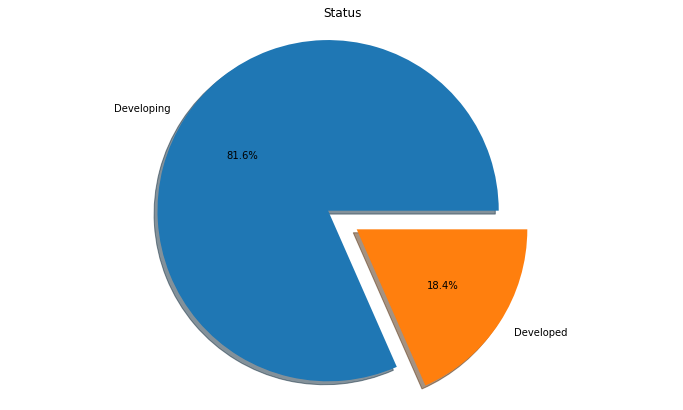

In [21]:
plt.figure(figsize=(12,7))
plt.pie(data_2015.Status.value_counts(),explode=[0.1,0.1],labels=['Developing','Developed'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Status')
plt.show()

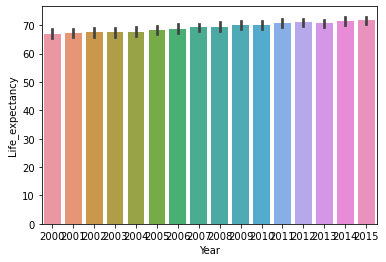

In [22]:
sns.barplot(x=data["Year"], y=data["Life_expectancy"], data=data)

Text(0.5, 1.0, 'Life Expectancy Values in Years by Regions in all years')

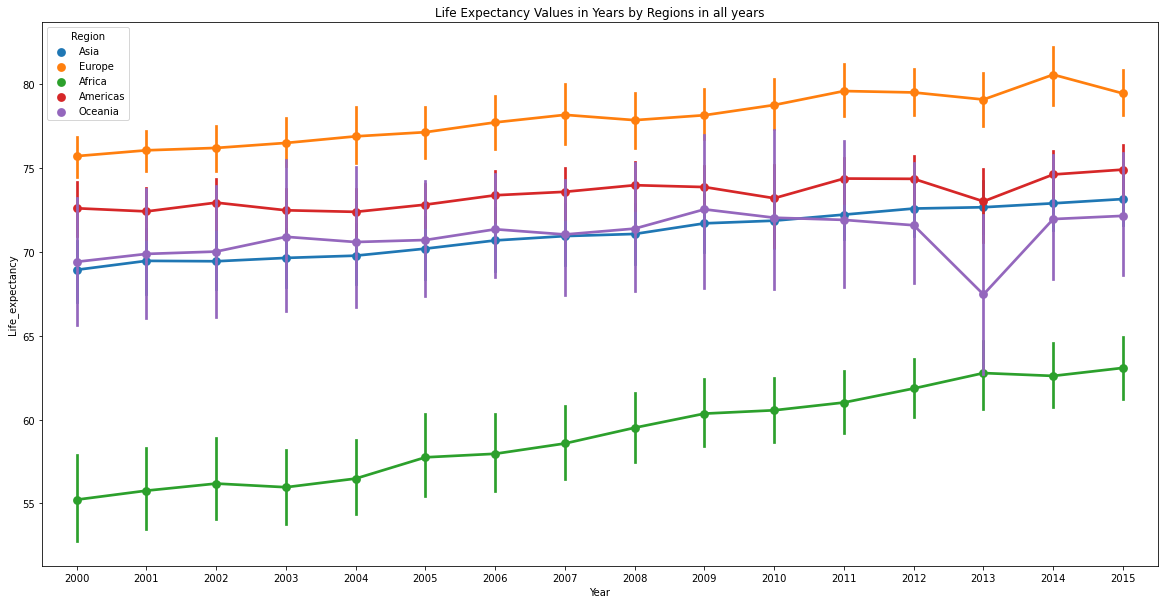

In [23]:
plt.figure(figsize=(20,10))
sns.pointplot(x=data["Year"], y=data["Life_expectancy"], data=data,hue='Region')
plt.title('Life Expectancy Values in Years by Regions in all years')

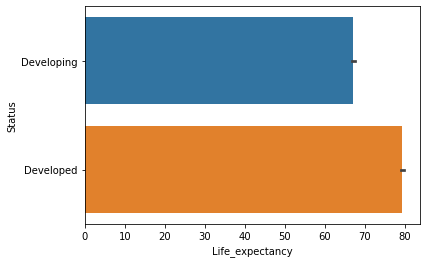

In [24]:
sns.barplot(y='Status', x='Life_expectancy', data=data, orient='h')

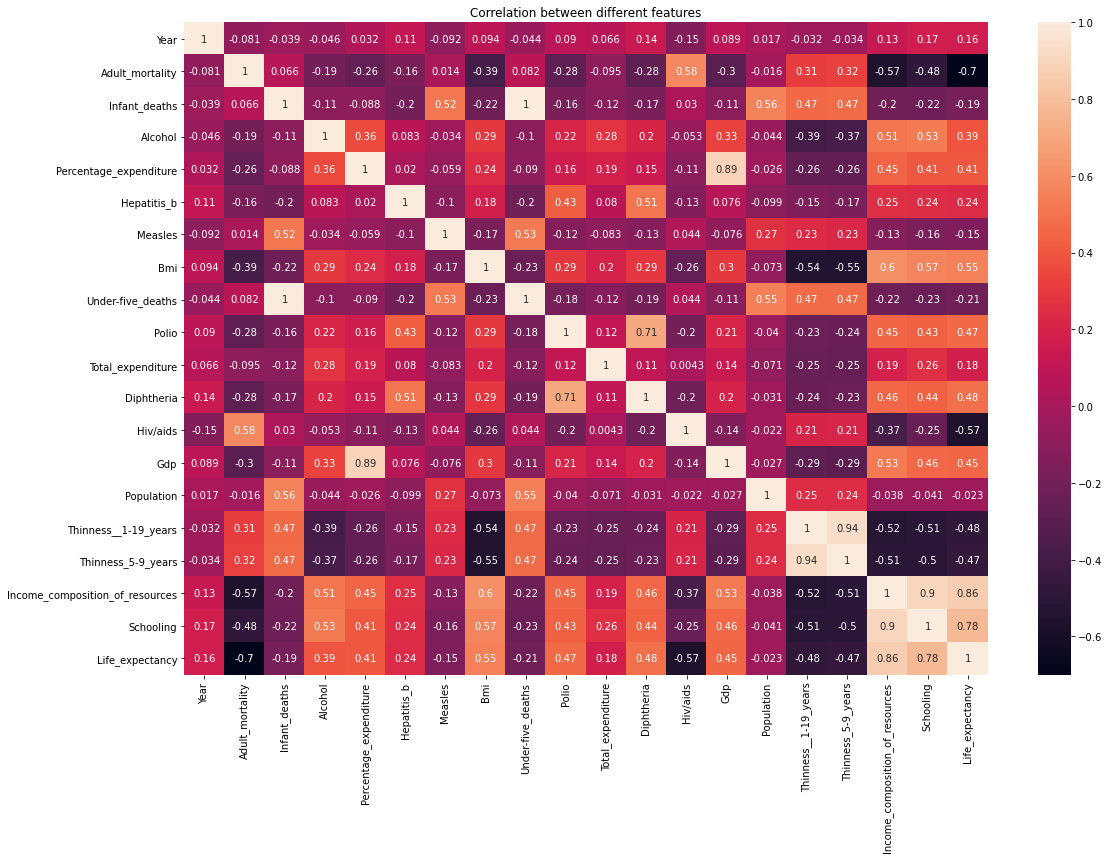

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation between different features');

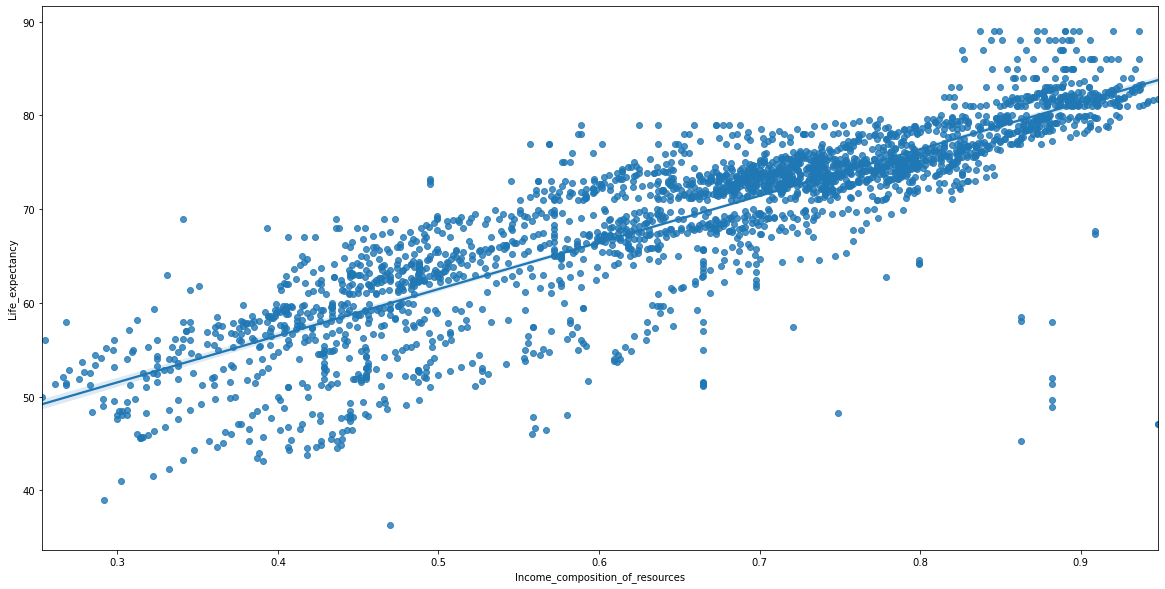

In [26]:
plt.figure(figsize=(20,10))
sns.regplot(x='Income_composition_of_resources', y="Life_expectancy",data=data)

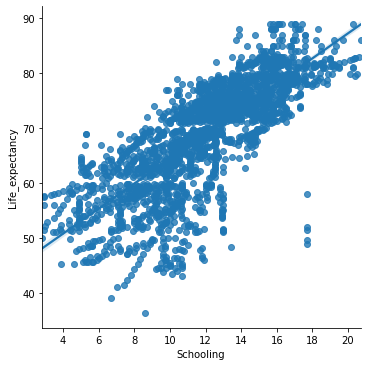

In [27]:

sns.lmplot(x="Schooling", y="Life_expectancy", data=data)

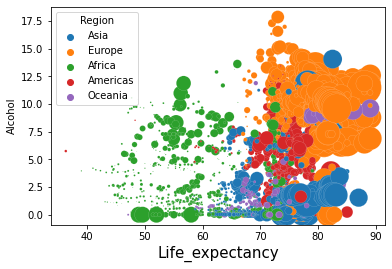

In [28]:
sns.scatterplot(x='Life_expectancy', 
                y='Alcohol', 
                hue='Region',
                data=data, 
                s=data.Gdp/100);
plt.xlabel('Life_expectancy',size=15)
plt.ylabel('Alcohol', size =10)
plt.show()

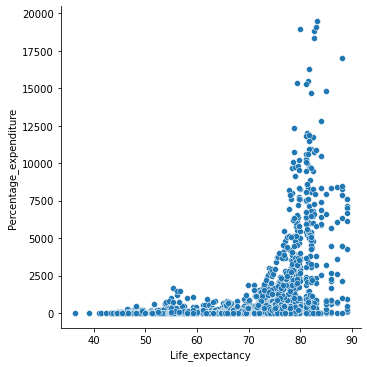

In [29]:
sns.relplot(x='Life_expectancy', 
                y='Percentage_expenditure',data=data)

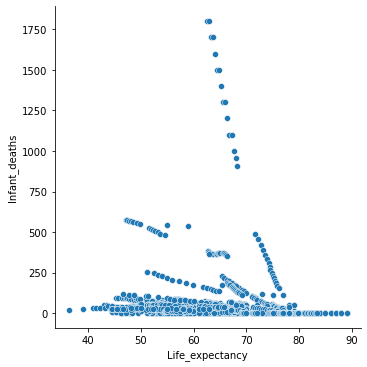

In [30]:
sns.relplot(x='Life_expectancy', 
                y='Infant_deaths',data=data)

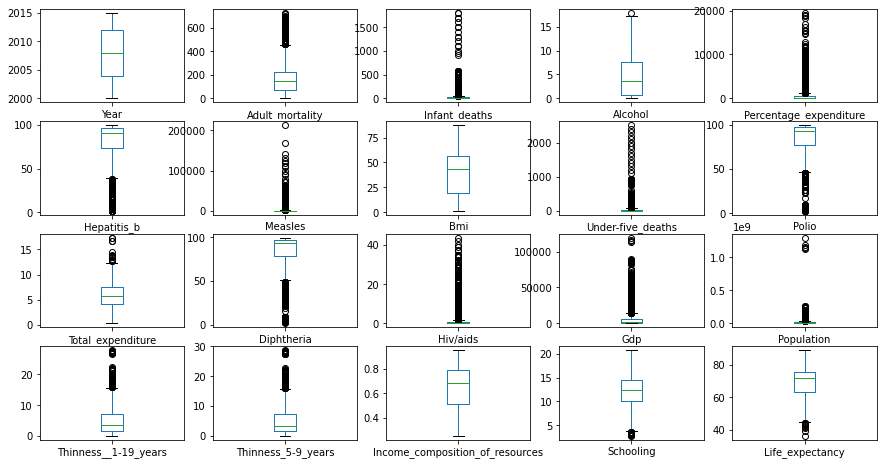

In [31]:
#Outlier detection
matplotlib.rcParams['figure.figsize'] = (15, 10)
data.plot(kind='box',subplots='true',layout=(5,5))
plt.show()

In [32]:
# Removing  the outliers using the interquartile range (IQR).
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Country']= label_encoder.fit_transform(data['Country']) 
data['Country'].unique() 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132])

In [34]:
data['Status']= label_encoder.fit_transform(data['Status']) 
data['Status'].unique() 

array([1, 0])

In [35]:
data['Region']= label_encoder.fit_transform(data['Region']) 
data['Region'].unique() 

array([3, 0, 1, 2, 4])

In [36]:
Status = pd.get_dummies(data.Status)
data = pd.concat([data, Status], axis = 1)
data= data.drop(['Status'], axis=1)

# Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(data) #standardize the feature matrix
pca = PCA(n_components=0.90, whiten=True)
X_pca = pca.fit_transform(X)
print (pca.explained_variance_ratio_)

[0.28141764 0.11089182 0.07497302 0.06774968 0.06321459 0.0542827
 0.0444031  0.04317844 0.04014705 0.03521962 0.03130772 0.0268448
 0.02448984 0.02244683]


In [38]:
print('Original Number of Features', X.shape[1]) 
print('Reduced Number of Features',X_pca.shape[1])

Original Number of Features 24
Reduced Number of Features 14


In [39]:
X = data.drop(['Life_expectancy'], axis=1)
y = pd.DataFrame(data['Life_expectancy'])

# Random Forest

In [40]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, y, test_size = 0.2,random_state = 70)

In [41]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train1,y_train1)

RandomForestRegressor()

In [42]:
print("Accuracy:",forest_reg.score(X_test1,y_test1))

Accuracy: 0.8554077854933797


In [43]:
scores = cross_val_score(forest_reg, X_train1, y_train1,cv=5).mean()
scores   

0.8435041322962334

In [44]:
scoring = make_scorer(r2_score)

#Make predictions
y_pred_rt = forest_reg.predict(X_train1) 
#Calculating RMSE 

rmse = r2_score(y_train1,y_pred_rt)

print(rmse)

0.9790162569842682


In [45]:
##Evaluate model on test

y_pred1 = forest_reg.predict(X_test1)

#Calculating RMSE
tree_rmse = r2_score(y_test1,y_pred1)

print("R^2 score: %.2f"%tree_rmse)

R^2 score: 0.86


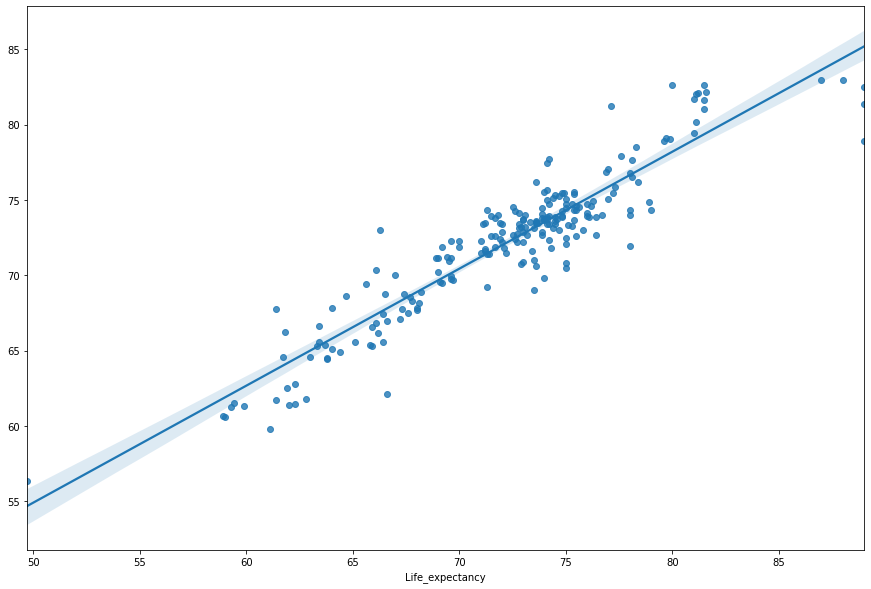

In [46]:
sns.regplot(y_test1,y_pred1)

# Linear Regression

In [47]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2,random_state = 71)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression()

In [50]:
y_pred_lt= reg.predict(X_train2)

In [51]:
train_rmse = r2_score(y_train2,y_pred_lt)
print(train_rmse)

0.7168117153011649


In [52]:
reg.score(X_train2, y_train2)

0.7168117153011649

In [53]:
y_pred2 = reg.predict(X_test2)

In [54]:
test_rmse = r2_score(y_test2,y_pred2)
print(test_rmse)

0.7433475519271071


In [55]:
print("Accuracy",reg.score(X_test2,y_test2))

Accuracy 0.7433475519271071


In [56]:
scores1 = cross_val_score(reg, X_train2, y_train2,cv=5).mean()
scores1  

0.6966713081827995

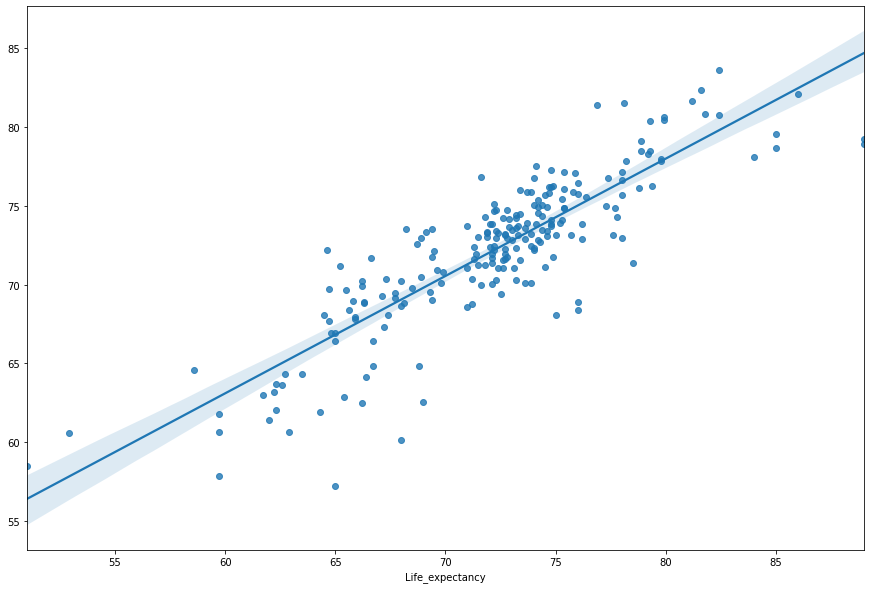

In [57]:
sns.regplot(y_test2,y_pred2)

# Polynomial  regression

In [58]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2,random_state = 70)

In [59]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train3) 
poly.fit(X_train3, y_train3) 


PolynomialFeatures()

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model=LinearRegression()
model.fit(X_poly,y_train3)

LinearRegression()

In [62]:
y_pred3=model.predict(poly.fit_transform(X_test3))

In [63]:
test_rmse = r2_score(y_test3,y_pred3)

In [64]:
test_rmse

0.6553336974844448

In [65]:
from sklearn.metrics import explained_variance_score

In [66]:
explained_variance_score(y_test3, y_pred3)

0.6652505557251611

In [67]:
scores2 = cross_val_score(model, X_train3, y_train3,cv=5).mean()
scores2  

0.6813739022236878

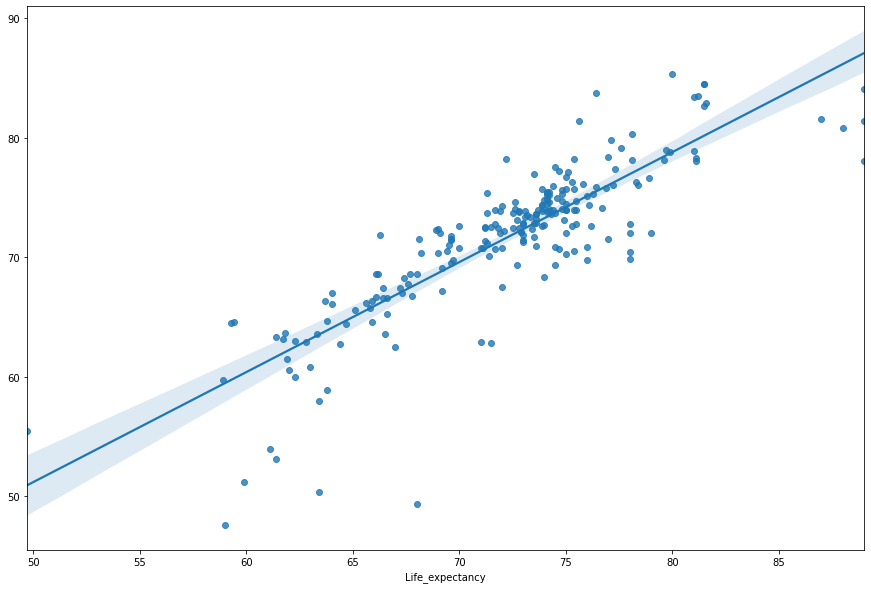

In [68]:
sns.regplot(y_test3,y_pred3)